# Shapes Study Representational Similarity analysis

Representational Similarity Analysis (RSA) is a way to compare and contrast different brain states and quantify the space in which they are embedded. RSA is a highly versatile tool: it can be used to compare brain activity to models, compare data across brain imaging techniques, and even to make cross-species comparisions.

## Goal of this script
>Load shapes data
>Compute RSA   
>Read a (dis)similarity matrix

### Step by step:

> 1. Load the data for each subject:  <br />
-Load t-maps from a trial-by-trial GLM (each t-map is a whole-brain map of a single trial, organized by condition).<br />
-Mask the data for each ROI.<br />
-Concatenate across all conditions (trial x voxel format)<br />
-Save the arrays as csv's for each subject<br />
> 2. Load labels for each condition
> 3. Compute correlation coefficients for each subject
> 4. Average corr.coefs across all subjects
> 5. Create similarity and dissimilarity matrices (group-level, trialwise)
<br />
<br />
> 6. Create mini matrices (group-level, condition-wise)
> 7. Create early vs. late mini matrices

## Import libraries

In [1]:
import numpy as np
#import scipy.io
#from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#import pandas as pd
#from sklearn.manifold import MDS
#import scipy.spatial.distance as sp_distance


# Import libraries
#import nibabel as nib
#from nilearn.input_data import NiftiMasker
#from nilearn.masking import compute_epi_mask

#from sklearn import preprocessing

#import time
#from nilearn import plotting
#from brainiak.searchlight.searchlight import Searchlight
#from scipy.sparse import random


#import warnings

# Load the data for each subject
Load t-stat images, mask the data using an ROI, and save as a csv file

Running this in sbatch so print the script below

In [2]:
!cat load_data_subj-wise_hipp.py

import numpy as np
import scipy.io
from scipy import stats
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.manifold import MDS
import scipy.spatial.distance as sp_distance
import nibabel as nib
from nilearn.input_data import NiftiMasker
from nilearn.masking import compute_epi_mask

from sklearn import preprocessing


sub_id = ['A328', 'A348', 'A415', 'A417', 'A420', 'A425', 'A437', 'A439', 'A548', 'A555', 'A556', 'A559', 'A583', 'A585', 'A592', 'A597', 'A600', 'A611', 'A616', 'A618', 'A620', 'A622', 'A625', 'A632', 'A634', 'A526', 'A640', 'A641', 'A642', 'A643', 'A647'] #subjectlist updated by PO & SK on 9/27/19 based on trialwise data (new BIC subjects need to be added later)

#'A200', 'A201', 'A202', 'A204', 'A210', 'A213', 'A216', 'A217', 'A222', 'A228', 'A232', 'A233', 'A234', 'A238', 'A246', 'A248', 'A255', 'A257', 'A261', 'A271', 'A280', 'A291', 'A294',


# Make a function to load the mask data, then tes

## Compute correlation coefficients

Each subject will have a concatenated (across all trials) csv file from the load_data function. 
Here, we are importing this csv back into a numpy array so we can compute the correlation coefficient



Create a "mini matrix" to show the average across all trials for each condition (one row per experimental condition instead of one row per trial)

shape will be 10 x 10: 
> T1 A+ <br />
> T1 A- <br />
> T1 B- <br />
> T1 AB- <br />
> T1 AC- <br />

> T2 A+ <br />
> T2 A- <br />
> T2 B- <br />
> T2 AB- <br />
> T2 AC- 

1. start by grabbing t-stat data for each subject [10x258]<br />
2. then average across each condition [row 0 &5, 1 & 6, etc -> 1x258]<br />
3. then concatenate the new averages for each subject [10x258]<br />
4. then compute the correlation coefficients [10x10]<br />
5. Fisher's r to z transform this [10x10]<br />
5. concatenate and average across all subjects [310x10  ->  10x10]

then repeat steps above for 5x5 (averaging across testing 1 and 2)

In [3]:
#MINI MATRIX avg across all trials
#steps 1-3 above


sub = ['A328', 'A348', 'A415', 'A417', 'A420', 'A425', 'A437', 'A439', 'A548', 'A555', 'A556', 'A559', 'A583', 'A585', 'A592', 'A597', 'A600', 'A611', 'A616', 'A618', 'A620', 'A622', 'A625', 'A632', 'A634', 'A526', 'A640', 'A641', 'A642', 'A643', 'A647'] 

#Rhipp
for x in sub:
    subj_name = str(x)
    varname = "subject_level_data/" + subj_name + "_Rhipp_concat_run_data.csv"
    Rhipp_concat_run_data= np.genfromtxt(varname, delimiter=",")
    Rhipp_subjwise_avgtrials_10x258= Rhipp_concat_run_data

    #make correlation coefficient array for each subject
    #first average across runs for each condition
    for i in range (0,5): #start at trial 1 (indexed at 0), do this 5
        Rhipp_subjwise_avgtrials_1x258 = np.mean(Rhipp_concat_run_data[i:Rhipp_concat_run_data.shape[0]:5], axis=0) #average trials of the same experimental condition
    
        #use if statement to concatenate the averages from above for all trials
        if i == 0:  #if the first one
            Rhipp_subjwise_avgtrials_5x258 = Rhipp_subjwise_avgtrials_1x258[None,:]  
            #print(Rhipp_avg_allconditions.shape)
        else:
            Rhipp_subjwise_avgtrials_5x258 = np.vstack([Rhipp_subjwise_avgtrials_5x258, Rhipp_subjwise_avgtrials_1x258[None,:]]) #This is not working currently because the axis are differeny

    #print('Rhipp_subjwise_avgtrials_5x258', Rhipp_subjwise_avgtrials_5x258.shape)
    #print(Rhipp_subjwise_avgtrials_10x258[:5,:5])
    
    Rhipp_r_subjwise_10x10 = np.corrcoef(Rhipp_subjwise_avgtrials_10x258) #numpy corrcoef expects array input to be in variable x observations (condition x voxel) shape 
    Rhipp_r_subjwise_5x5 = np.corrcoef(Rhipp_subjwise_avgtrials_5x258) #numpy corrcoef expects array input to be in variable x observations (condition x voxel) shape 

    #print(Rhipp_r_subjwise_avgtrials.shape)
    
    #export into a csv for each subject (will import back later and average across subjects)
    r_varname = "subject_level_data/" + subj_name + "_Rhipp_r_subjwise_10x10.csv"
    np.savetxt(r_varname, Rhipp_r_subjwise_10x10, delimiter=",")
    r_varname_5 = "subject_level_data/" + subj_name + "_Rhipp_r_subjwise_5x5.csv"
    np.savetxt(r_varname_5, Rhipp_r_subjwise_5x5, delimiter=",")
    
    
    #FISHER R TO Z transform
    Rhipp_z_10x10 = np.arctanh(Rhipp_r_subjwise_10x10) #PO & SK checked these values using an online Fisher's transform calculator
    Rhipp_z_5x5 = np.arctanh(Rhipp_r_subjwise_5x5)
    
    #export into a csv for each subject (will import back later and average across subjects)
    z_varname = "subject_level_data/" + subj_name + "_Rhipp_z_10x10.csv"
    np.savetxt(z_varname, Rhipp_z_10x10, delimiter=",")
    z_varname_5 = "subject_level_data/" + subj_name + "_Rhipp_z_5x5.csv"
    np.savetxt(z_varname_5, Rhipp_z_5x5, delimiter=",")
    #print(Rhipp_z_10x10[1])
    #print(Rhipp_r_subjwise_10x10[1])
    #print(Rhipp_z_5x5.shape)
    
    
    #now concatenate across subjects for averaging later on in notebook
    if subj_name == sub[0]: #if the first one
        #print ('sub:', sub)
        Rhipp_concat_z_155x5 = Rhipp_z_5x5
        #print('concat subject 1 shape:', Rhipp_concat_r_subjwise_avgtrials.shape) #10x10
        Rhipp_concat_z_310x10 = Rhipp_z_10x10
        #print('concat subject 1 shape _earlylate:', Rhipp_concat_r_subjwise_avgtrials_earlylate.shape) 
    else:
        #print ('sub:', sub)
        Rhipp_concat_z_155x5 = np.append(Rhipp_concat_z_155x5, Rhipp_z_5x5, axis = 0)
        #print('concat subject+1 shape:', Rhipp_concat_r_subjwise_avgtrials.shape) #310x10
        Rhipp_concat_z_310x10 = np.append(Rhipp_concat_z_310x10, Rhipp_z_10x10, axis = 0)
        #print('concat subject+1 shape _earlylate:', Rhipp_concat_r_subjwise_avgtrials_earlylate.shape) 
         
        
    
#check dimensions
print('Rhipp_r_subjwise_5x5', Rhipp_r_subjwise_5x5.shape)
print('Rhipp_r_subjwise_10x10', Rhipp_r_subjwise_10x10.shape)
print('Rhipp_z_5x5', Rhipp_z_5x5.shape)
print('Rhipp_z_10x10', Rhipp_z_10x10.shape)
print('R hipp concat subject+1 shape _310x258:', Rhipp_concat_z_310x10.shape)  
print('R hipp concat subject+1 shape _155x258:', Rhipp_concat_z_155x5.shape)  

/nexsan/apps/hpc/Langs/Python/3.5-anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:42: RuntimeWarning: divide by zero encountered in arctanh
/nexsan/apps/hpc/Langs/Python/3.5-anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in arctanh


Rhipp_r_subjwise_5x5 (5, 5)
Rhipp_r_subjwise_10x10 (10, 10)
Rhipp_z_5x5 (5, 5)
Rhipp_z_10x10 (10, 10)
R hipp concat subject+1 shape _310x258: (310, 10)
R hipp concat subject+1 shape _155x258: (155, 5)


Rhipp_z_avgsubj_10x10.shape (10, 10)
Rhipp_z_avgsubj_10x10.shape (10, 10)
Rhipp_z_avgsubj_5x5.shape (5, 5)
[ 1.          0.10428152  0.07123486  0.11762461  0.12261633  0.07570136
  0.0334367   0.06265097  0.08692095  0.0021988 ]
[ 1.          0.15136266  0.12741946  0.15804909  0.11090075]


<IPython.core.display.Javascript object>


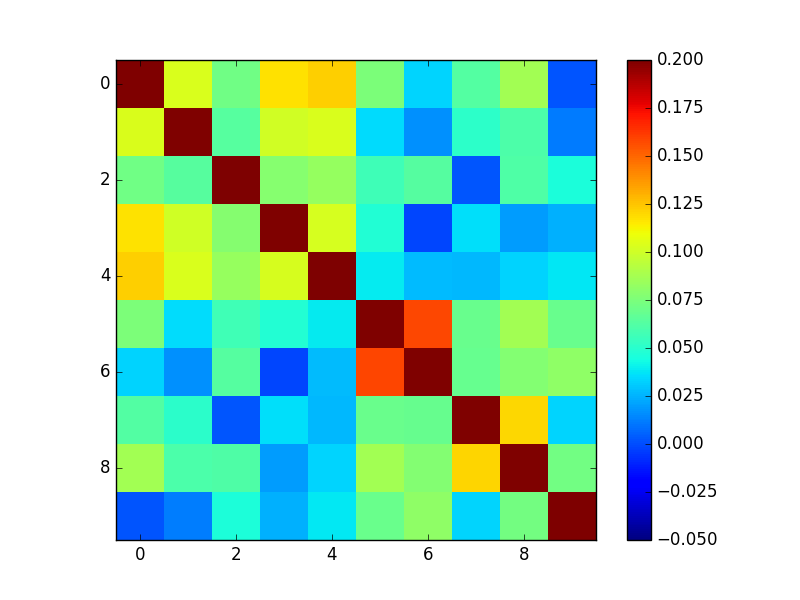

<IPython.core.display.Javascript object>


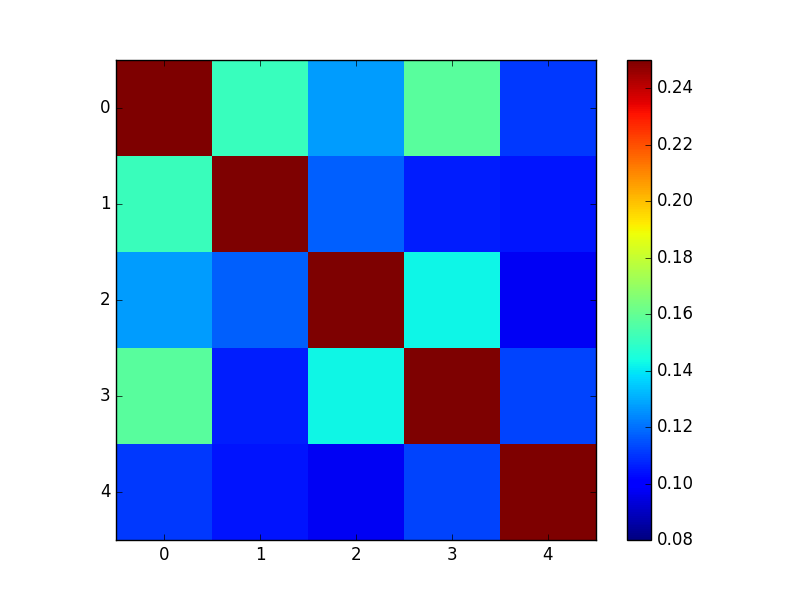

In [21]:
#now average z-values across subjects to get mini matrices


for i in range (0,10): #do this 10 times
    Rhipp_z_avgsubj_10 = np.mean(Rhipp_concat_z_310x10[i:Rhipp_concat_z_310x10.shape[0]:10], axis=0) 
    #average across all subjects based on the trial# (every 60th row)

    #use if statement to concatenate the averages from above for all trials
    if i == 0:  #if the first one
        Rhipp_z_avgsubj_10x10 = Rhipp_z_avgsubj_10[None,:]  
        #print(Rhipp_avg_subj_bytrial.shape)
    else:
        Rhipp_z_avgsubj_10x10 = np.vstack([Rhipp_z_avgsubj_10x10, Rhipp_z_avgsubj_10[None,:]]) 

print('Rhipp_z_avgsubj_10x10.shape',Rhipp_z_avgsubj_10x10.shape)
#print(Rhipp_r_subjwise_mini)


for i in range (0,5): #do this 5 times
    Rhipp_z_avgsubj_5 = np.mean(Rhipp_concat_z_155x5[i:Rhipp_concat_z_155x5.shape[0]:5], axis=0) 
    #average across all subjects based on the trial# (every 5th row)

    #use if statement to concatenate the averages from above for all trials
    if i == 0:  #if the first one
        Rhipp_z_avgsubj_5x5 = Rhipp_z_avgsubj_5[None,:]  
        #print(Rhipp_avg_subj_bytrial.shape)
    else:
        Rhipp_z_avgsubj_5x5 = np.vstack([Rhipp_z_avgsubj_5x5, Rhipp_z_avgsubj_5[None,:]]) 

print('Rhipp_z_avgsubj_10x10.shape',Rhipp_z_avgsubj_10x10.shape)
print('Rhipp_z_avgsubj_5x5.shape',Rhipp_z_avgsubj_5x5.shape)

#print(Rhipp_r_subjwise_mini)

#change Inf to 1

Rhipp_z_avgsubj_10x10[np.isposinf(Rhipp_z_avgsubj_10x10)] = 1
print(Rhipp_z_avgsubj_10x10[0])

Rhipp_z_avgsubj_5x5[np.isposinf(Rhipp_z_avgsubj_5x5)] = 1
print(Rhipp_z_avgsubj_5x5[0])


plt.rcParams["figure.dpi"] = 100.0
#Rhipp_r = np.corrcoef(Rhipp_avg_subj_bytrial) #numpy corrcoef expects array input to be in variable x observations shape 
#(which is why this was transposed in load_data)
plt.figure()
plt.imshow(Rhipp_z_avgsubj_10x10, cmap='jet', interpolation='none')
plt.clim(-0.05, 0.2)
#plt.xaxis.set_minor_locator(AutoMinorLocator())
plt.colorbar()
plt.savefig('Rhipp_z_avgsubj_10x10.png', dpi=300)


plt.rcParams["figure.dpi"] = 100.0
#Rhipp_r = np.corrcoef(Rhipp_avg_subj_bytrial) #numpy corrcoef expects array input to be in variable x observations shape 
#(which is why this was transposed in load_data)
plt.figure()
plt.imshow(Rhipp_z_avgsubj_5x5, cmap='jet', interpolation='none')
plt.clim(0.08, 0.25)
#plt.xaxis.set_minor_locator(AutoMinorLocator())
plt.colorbar()
plt.savefig('Rhipp_z_avgsubj_5x5.png', dpi=300)



In [5]:
#pull out cells of interest

#AvsB (2,1)

    
    
sub = ['A328', 'A348', 'A415', 'A417', 'A420', 'A425', 'A437', 'A439', 'A548', 'A555', 'A556', 'A559', 'A583', 'A585', 'A592', 'A597', 'A600', 'A611', 'A616', 'A618', 'A620', 'A622', 'A625', 'A632', 'A634', 'A526', 'A640', 'A641', 'A642', 'A643', 'A647'] 

#Rhipp
for x in sub:
    subj_name = str(x)
    z_varname_5 = "subject_level_data/" + subj_name + "_Rhipp_z_5x5.csv"
    Rhipp_z_5x5= np.genfromtxt(z_varname_5, delimiter=",")

    Rhipp_subjwise_BvsA = Rhipp_z_5x5[2,1] 
    Rhipp_subjwise_ABvsA = Rhipp_z_5x5[3,1]
    Rhipp_subjwise_ABvsB = Rhipp_z_5x5[3,2] 
    
    
    #use if statement to concatenate the averages from above for all trials
    if x == str(sub[0]):  #if the first one
        Rhipp_BvsA_31 = Rhipp_subjwise_BvsA 
        Rhipp_ABvsA_31 = Rhipp_subjwise_ABvsA 
        Rhipp_ABvsB_31 = Rhipp_subjwise_ABvsB 

    else:
        Rhipp_BvsA_31 = np.vstack([Rhipp_BvsA_31, Rhipp_subjwise_BvsA]) #This is not working currently because the axis are differeny
        Rhipp_ABvsA_31 = np.vstack([Rhipp_ABvsA_31, Rhipp_subjwise_ABvsA]) #This is not working currently because the axis are differeny
        Rhipp_ABvsB_31 = np.vstack([Rhipp_ABvsB_31, Rhipp_subjwise_ABvsB]) #This is not working currently because the axis are differeny

 
#print(Rhipp_ABvsA_31)

z_varname_31 = "z_scores/" + "Rhipp_BvsA_31.csv"
np.savetxt(z_varname_31, Rhipp_BvsA_31,  delimiter=",")
z_varname_31 = "z_scores/" + "Rhipp_ABvsA_31.csv"
np.savetxt(z_varname_31, Rhipp_ABvsA_31,  delimiter=",")
z_varname_31 = "z_scores/" + "Rhipp_ABvsB_31.csv"
np.savetxt(z_varname_31, Rhipp_ABvsB_31,  delimiter=",")
        
print(np.mean(Rhipp_BvsA_31))
print(np.mean(Rhipp_ABvsA_31))
print(np.mean(Rhipp_ABvsB_31))

0.117691548841
0.106173485628
0.142678290515


In [6]:
#pull out cells of interest for testing 1 and testing 2

#AvsB (2,1)

    
    
sub = ['A328', 'A348', 'A415', 'A417', 'A420', 'A425', 'A437', 'A439', 'A548', 'A555', 'A556', 'A559', 'A583', 'A585', 'A592', 'A597', 'A600', 'A611', 'A616', 'A618', 'A620', 'A622', 'A625', 'A632', 'A634', 'A526', 'A640', 'A641', 'A642', 'A643', 'A647'] 

#Rhipp
for x in sub:
    subj_name = str(x)
    z_varname_10 = "subject_level_data/" + subj_name + "_Rhipp_z_10x10.csv"
    Rhipp_z_10x10= np.genfromtxt(z_varname_10, delimiter=",")

    Rhipp_subjwise_BvsA_t1 = Rhipp_z_10x10[2,1] 
    Rhipp_subjwise_ABvsA_t1 = Rhipp_z_10x10[3,1]
    Rhipp_subjwise_ABvsB_t1 = Rhipp_z_10x10[3,2] 
    
    Rhipp_subjwise_BvsA_t2 = Rhipp_z_10x10[7,6] 
    Rhipp_subjwise_ABvsA_t2 = Rhipp_z_10x10[8,6]
    Rhipp_subjwise_ABvsB_t2 = Rhipp_z_10x10[8,7]
    
    #use if statement to concatenate the averages from above for all trials
    if x == str(sub[0]):  #if the first one
        Rhipp_BvsA_t1_31 = Rhipp_subjwise_BvsA_t1
        Rhipp_ABvsA_t1_31 = Rhipp_subjwise_ABvsA_t1 
        Rhipp_ABvsB_t1_31 = Rhipp_subjwise_ABvsB_t1 
        
        Rhipp_BvsA_t2_31 = Rhipp_subjwise_BvsA_t2
        Rhipp_ABvsA_t2_31 = Rhipp_subjwise_ABvsA_t2 
        Rhipp_ABvsB_t2_31 = Rhipp_subjwise_ABvsB_t2 


    else:
        Rhipp_BvsA_t1_31 = np.vstack([Rhipp_BvsA_t1_31, Rhipp_subjwise_BvsA_t1]) #This is not working currently because the axis are differeny
        Rhipp_ABvsA_t1_31 = np.vstack([Rhipp_ABvsA_t1_31, Rhipp_subjwise_ABvsA_t1]) #This is not working currently because the axis are differeny
        Rhipp_ABvsB_t1_31 = np.vstack([Rhipp_ABvsB_t1_31, Rhipp_subjwise_ABvsB_t1]) #This is not working currently because the axis are differeny

        Rhipp_BvsA_t2_31 = np.vstack([Rhipp_BvsA_t2_31, Rhipp_subjwise_BvsA_t2]) #This is not working currently because the axis are differeny
        Rhipp_ABvsA_t2_31 = np.vstack([Rhipp_ABvsA_t2_31, Rhipp_subjwise_ABvsA_t2]) #This is not working currently because the axis are differeny
        Rhipp_ABvsB_t2_31 = np.vstack([Rhipp_ABvsB_t2_31, Rhipp_subjwise_ABvsB_t2]) #This is not working currently because the axis are differeny

 
#print(Rhipp_ABvsA_31)

z_varname_31_t1 = "z_scores/" + "Rhipp_BvsA_t1_31.csv"
np.savetxt(z_varname_31_t1, Rhipp_BvsA_t1_31,  delimiter=",")
z_varname_31_t1 = "z_scores/" + "Rhipp_ABvsA_t1_31.csv"
np.savetxt(z_varname_31_t1, Rhipp_ABvsA_t1_31,  delimiter=",")
z_varname_31_t1 = "z_scores/" + "Rhipp_ABvsB_t1_31.csv"
np.savetxt(z_varname_31_t1, Rhipp_ABvsB_t1_31,  delimiter=",")


z_varname_31_t2 = "z_scores/" + "Rhipp_BvsA_t2_31.csv"
np.savetxt(z_varname_31_t2, Rhipp_BvsA_t2_31,  delimiter=",")
z_varname_31_t2 = "z_scores/" + "Rhipp_ABvsA_t2_31.csv"
np.savetxt(z_varname_31_t2, Rhipp_ABvsA_t2_31,  delimiter=",")
z_varname_31_t2 = "z_scores/" + "Rhipp_ABvsB_t2_31.csv"
np.savetxt(z_varname_31_t2, Rhipp_ABvsB_t2_31,  delimiter=",")
        
print(np.mean(Rhipp_BvsA_t1_31))
print(np.mean(Rhipp_ABvsA_t1_31))
print(np.mean(Rhipp_ABvsB_t1_31))

print(np.mean(Rhipp_BvsA_t2_31))
print(np.mean(Rhipp_ABvsA_t2_31))
print(np.mean(Rhipp_ABvsB_t2_31))

0.0642168996723
0.101005360422
0.0785887618067
0.0688659042709
0.0774534455639
0.120745197473


In [7]:
def randomise_diff(diff_data, resample_num=10000):        
   
    # Resample the participants
    resample_diff = []
    for i in range(resample_num):
       
        # Determine what participants to use in the sample
        sub_idx = np.random.randint(0, len(diff_data), (1, len(diff_data)))

        resample_diff += [np.mean(diff_data[sub_idx])]
   
    # What direction was the effect
    sign_count = np.sum((diff_data) > 0)
   
    # Calculate the 2 way p value
    sign = ((np.mean(resample_diff) > 0) * 2) - 1
    p_val = (1 - ((np.sum(np.asarray(resample_diff) * sign < 0) + 1) / (resample_num + 1))) * 2
   
    # If the value is greater than 1 then subtract 2
    if p_val > 1:
        p_val = 2 - p_val
   
    # return the p value and the number of participants that have an effect above 0
    return p_val, sign_count

In [8]:
#np.set_printoptions(precision)

Rhipp_BvsA_31_p, Rhipp_BvsA_31_sign_count = randomise_diff(Rhipp_BvsA_31, resample_num=10000)
print(Rhipp_BvsA_31_sign_count)
print(format(Rhipp_BvsA_31_p,'.30f'))
# p_varname = "p_values/" + "Rhipp_BvsA_31_p.csv"
# np.savetxt(p_varname, Rhipp_BvsA_31_p[None])

Rhipp_ABvsA_31_p, Rhipp_ABvsA_31_sign_count = randomise_diff(Rhipp_ABvsA_31, resample_num=10000)
print(Rhipp_ABvsA_31_sign_count)
print(format(Rhipp_ABvsA_31_p,'.30f'))
# p_varname = "p_values/" + "Rhipp_ABvsA_31_p.csv"
# np.savetxt(p_varname, Rhipp_ABvsA_31_p[None])

Rhipp_ABvsB_31_p, Rhipp_ABvsB_31_sign_count = randomise_diff(Rhipp_ABvsB_31, resample_num=10000)
print(Rhipp_ABvsB_31_sign_count)
print(format(Rhipp_ABvsB_31_p,'.30f'))
# p_varname = "p_values/" + "Rhipp_ABvsB_31_p.csv"
# np.savetxt(p_varname, Rhipp_ABvsB_31_p[None])


24
0.000199980001999833234549441840
24
0.000199980001999833234549441840
28
0.000199980001999833234549441840


In [9]:
#run randomise_diff with testing 1 and testing 2

Rhipp_BvsA_t1_31_p, Rhipp_BvsA_t1_31_sign_count = randomise_diff(Rhipp_BvsA_t1_31, resample_num=10000)
print(Rhipp_BvsA_t1_31_sign_count)
print(format(Rhipp_BvsA_t1_31_p,'.30f'))
# p_varname = "p_values/" + "Rhipp_BvsA_t1_31_p.csv"
# np.savetxt(p_varname, Rhipp_BvsA_t1_31_p[None])

Rhipp_ABvsA_t1_31_p, Rhipp_ABvsA_t1_31_sign_count = randomise_diff(Rhipp_ABvsA_t1_31, resample_num=10000)
print(Rhipp_ABvsA_t1_31_sign_count)
print(format(Rhipp_ABvsA_t1_31_p,'.30f'))
# p_varname = "p_values/" + "Rhipp_ABvsA_t1_31_p.csv"
# np.savetxt(p_varname, Rhipp_ABvsA_t1_31_p[None])

Rhipp_ABvsB_t1_31_p, Rhipp_ABvsB_t1_31_sign_count = randomise_diff(Rhipp_ABvsB_t1_31, resample_num=10000)
print(Rhipp_ABvsB_t1_31_sign_count)
print(format(Rhipp_ABvsB_t1_31_p,'.30f'))
# p_varname = "p_values/" + "Rhipp_ABvsB_t1_31_p.csv"
# np.savetxt(p_varname, Rhipp_ABvsB_t1_31_p[None])



Rhipp_BvsA_t2_31_p, Rhipp_BvsA_t2_31_sign_count = randomise_diff(Rhipp_BvsA_t2_31, resample_num=10000)
print(Rhipp_BvsA_t2_31_sign_count)
print(format(Rhipp_BvsA_t2_31_p,'.30f'))
# p_varname = "p_values/" + "Rhipp_BvsA_t2_31_p.csv"
# np.savetxt(p_varname, Rhipp_BvsA_t2_31_p[None])

Rhipp_ABvsA_t2_31_p, Rhipp_ABvsA_t2_31_sign_count = randomise_diff(Rhipp_ABvsA_t2_31, resample_num=10000)
print(Rhipp_ABvsA_t2_31_sign_count)
print(format(Rhipp_ABvsA_t2_31_p,'.30f'))
# p_varname = "p_values/" + "Rhipp_ABvsA_t2_31_p.csv"
# np.savetxt(p_varname, Rhipp_ABvsA_t2_31_p[None])

Rhipp_ABvsB_t2_31_p, Rhipp_ABvsB_t2_31_sign_count = randomise_diff(Rhipp_ABvsB_t2_31, resample_num=10000)
print(Rhipp_ABvsB_t2_31_sign_count)
print(format(Rhipp_ABvsB_t2_31_p,'.30f'))
# p_varname = "p_values/" + "Rhipp_ABvsB_t2_31_p.csv"
# np.savetxt(p_varname, Rhipp_ABvsB_t2_31_p[None])

20
0.028797120287971100793811274343
26
0.000199980001999833234549441840
21
0.012198780121987828906071626989
20
0.007799220077992163879798681592
24
0.000799920007999110893592842331
22
0.000399960003999666469098883681


## RUN AMYG AND vmPFC

In [10]:
## NOW RUN FOR AMYGDALA AND VMPFC

#Ramyg
for x in sub:
    subj_name = str(x)
    varname = "subject_level_data/" + subj_name + "_Ramyg_concat_run_data.csv"
    Ramyg_concat_run_data= np.genfromtxt(varname, delimiter=",")
    Ramyg_subjwise_avgtrials_10x258= Ramyg_concat_run_data

    #make correlation coefficient array for each subject
    #first average across runs for each condition
    for i in range (0,5): #start at trial 1 (indexed at 0), do this 5
        Ramyg_subjwise_avgtrials_1x258 = np.mean(Ramyg_concat_run_data[i:Ramyg_concat_run_data.shape[0]:5], axis=0) #average trials of the same experimental condition
    
        #use if statement to concatenate the averages from above for all trials
        if i == 0:  #if the first one
            Ramyg_subjwise_avgtrials_5x258 = Ramyg_subjwise_avgtrials_1x258[None,:]  
            #print(Ramyg_avg_allconditions.shape)
        else:
            Ramyg_subjwise_avgtrials_5x258 = np.vstack([Ramyg_subjwise_avgtrials_5x258, Ramyg_subjwise_avgtrials_1x258[None,:]]) #This is not working currently because the axis are differeny

    #print('Ramyg_subjwise_avgtrials_5x258', Ramyg_subjwise_avgtrials_5x258.shape)
    #print(Ramyg_subjwise_avgtrials_10x258[:5,:5])
    
    Ramyg_r_subjwise_10x10 = np.corrcoef(Ramyg_subjwise_avgtrials_10x258) #numpy corrcoef expects array input to be in variable x observations (condition x voxel) shape 
    Ramyg_r_subjwise_5x5 = np.corrcoef(Ramyg_subjwise_avgtrials_5x258) #numpy corrcoef expects array input to be in variable x observations (condition x voxel) shape 

    #print(Ramyg_r_subjwise_avgtrials.shape)
    
    #export into a csv for each subject (will import back later and average across subjects)
    r_varname = "subject_level_data/" + subj_name + "_Ramyg_r_subjwise_10x10.csv"
    np.savetxt(r_varname, Ramyg_r_subjwise_10x10, delimiter=",")
    r_varname_5 = "subject_level_data/" + subj_name + "_Ramyg_r_subjwise_5x5.csv"
    np.savetxt(r_varname_5, Ramyg_r_subjwise_5x5, delimiter=",")
    
    
    #FISHER R TO Z transform
    Ramyg_z_10x10 = np.arctanh(Ramyg_r_subjwise_10x10) #PO & SK checked these values using an online Fisher's transform calculator
    Ramyg_z_5x5 = np.arctanh(Ramyg_r_subjwise_5x5)
    
    #export into a csv for each subject (will import back later and average across subjects)
    z_varname = "subject_level_data/" + subj_name + "_Ramyg_z_10x10.csv"
    np.savetxt(z_varname, Ramyg_z_10x10, delimiter=",")
    z_varname_5 = "subject_level_data/" + subj_name + "_Ramyg_z_5x5.csv"
    np.savetxt(z_varname_5, Ramyg_z_5x5, delimiter=",")
    #print(Ramyg_z_10x10[1])
    #print(Ramyg_r_subjwise_10x10[1])
    #print(Ramyg_z_5x5.shape)
    
    
    #now concatenate across subjects for averaging later on in notebook
    if subj_name == sub[0]: #if the first one
        #print ('sub:', sub)
        Ramyg_concat_z_155x5 = Ramyg_z_5x5
        #print('concat subject 1 shape:', Ramyg_concat_r_subjwise_avgtrials.shape) #10x10
        Ramyg_concat_z_310x10 = Ramyg_z_10x10
        #print('concat subject 1 shape _earlylate:', Ramyg_concat_r_subjwise_avgtrials_earlylate.shape) 
    else:
        #print ('sub:', sub)
        Ramyg_concat_z_155x5 = np.append(Ramyg_concat_z_155x5, Ramyg_z_5x5, axis = 0)
        #print('concat subject+1 shape:', Ramyg_concat_r_subjwise_avgtrials.shape) #310x10
        Ramyg_concat_z_310x10 = np.append(Ramyg_concat_z_310x10, Ramyg_z_10x10, axis = 0)
        #print('concat subject+1 shape _earlylate:', Ramyg_concat_r_subjwise_avgtrials_earlylate.shape) 
         
        
    
#check dimensions
print('Ramyg_r_subjwise_5x5', Ramyg_r_subjwise_5x5.shape)
print('Ramyg_r_subjwise_10x10', Ramyg_r_subjwise_10x10.shape)
print('Ramyg_z_5x5', Ramyg_z_5x5.shape)
print('Ramyg_z_10x10', Ramyg_z_10x10.shape)
print('R hipp concat subject+1 shape _310x258:', Ramyg_concat_z_310x10.shape)  
print('R hipp concat subject+1 shape _155x258:', Ramyg_concat_z_155x5.shape) 


# Rantvmpfc
for x in sub:
    subj_name = str(x)
    varname = "subject_level_data/" + subj_name + "_Rantvmpfc_concat_run_data.csv"
    Rantvmpfc_concat_run_data= np.genfromtxt(varname, delimiter=",")
    Rantvmpfc_subjwise_avgtrials_10x258= Rantvmpfc_concat_run_data

    #make correlation coefficient array for each subject
    #first average across runs for each condition
    for i in range (0,5): #start at trial 1 (indexed at 0), do this 5
        Rantvmpfc_subjwise_avgtrials_1x258 = np.mean(Rantvmpfc_concat_run_data[i:Rantvmpfc_concat_run_data.shape[0]:5], axis=0) #average trials of the same experimental condition
    
        #use if statement to concatenate the averages from above for all trials
        if i == 0:  #if the first one
            Rantvmpfc_subjwise_avgtrials_5x258 = Rantvmpfc_subjwise_avgtrials_1x258[None,:]  
            #print(Rantvmpfc_avg_allconditions.shape)
        else:
            Rantvmpfc_subjwise_avgtrials_5x258 = np.vstack([Rantvmpfc_subjwise_avgtrials_5x258, Rantvmpfc_subjwise_avgtrials_1x258[None,:]]) #This is not working currently because the axis are differeny

    #print('Rantvmpfc_subjwise_avgtrials_5x258', Rantvmpfc_subjwise_avgtrials_5x258.shape)
    #print(Rantvmpfc_subjwise_avgtrials_10x258[:5,:5])
    
    Rantvmpfc_r_subjwise_10x10 = np.corrcoef(Rantvmpfc_subjwise_avgtrials_10x258) #numpy corrcoef expects array input to be in variable x observations (condition x voxel) shape 
    Rantvmpfc_r_subjwise_5x5 = np.corrcoef(Rantvmpfc_subjwise_avgtrials_5x258) #numpy corrcoef expects array input to be in variable x observations (condition x voxel) shape 

    #print(Rantvmpfc_r_subjwise_avgtrials.shape)
    
    #export into a csv for each subject (will import back later and average across subjects)
    r_varname = "subject_level_data/" + subj_name + "_Rantvmpfc_r_subjwise_10x10.csv"
    np.savetxt(r_varname, Rantvmpfc_r_subjwise_10x10, delimiter=",")
    r_varname_5 = "subject_level_data/" + subj_name + "_Rantvmpfc_r_subjwise_5x5.csv"
    np.savetxt(r_varname_5, Rantvmpfc_r_subjwise_5x5, delimiter=",")
    
    
    #FISHER R TO Z transform
    Rantvmpfc_z_10x10 = np.arctanh(Rantvmpfc_r_subjwise_10x10) #PO & SK checked these values using an online Fisher's transform calculator
    Rantvmpfc_z_5x5 = np.arctanh(Rantvmpfc_r_subjwise_5x5)
    
    #export into a csv for each subject (will import back later and average across subjects)
    z_varname = "subject_level_data/" + subj_name + "_Rantvmpfc_z_10x10.csv"
    np.savetxt(z_varname, Rantvmpfc_z_10x10, delimiter=",")
    z_varname_5 = "subject_level_data/" + subj_name + "_Rantvmpfc_z_5x5.csv"
    np.savetxt(z_varname_5, Rantvmpfc_z_5x5, delimiter=",")
    #print(Rantvmpfc_z_10x10[1])
    #print(Rantvmpfc_r_subjwise_10x10[1])
    #print(Rantvmpfc_z_5x5.shape)
    
    
    #now concatenate across subjects for averaging later on in notebook
    if subj_name == sub[0]: #if the first one
        #print ('sub:', sub)
        Rantvmpfc_concat_z_155x5 = Rantvmpfc_z_5x5
        #print('concat subject 1 shape:', Rantvmpfc_concat_r_subjwise_avgtrials.shape) #10x10
        Rantvmpfc_concat_z_310x10 = Rantvmpfc_z_10x10
        #print('concat subject 1 shape _earlylate:', Rantvmpfc_concat_r_subjwise_avgtrials_earlylate.shape) 
    else:
        #print ('sub:', sub)
        Rantvmpfc_concat_z_155x5 = np.append(Rantvmpfc_concat_z_155x5, Rantvmpfc_z_5x5, axis = 0)
        #print('concat subject+1 shape:', Rantvmpfc_concat_r_subjwise_avgtrials.shape) #310x10
        Rantvmpfc_concat_z_310x10 = np.append(Rantvmpfc_concat_z_310x10, Rantvmpfc_z_10x10, axis = 0)
        #print('concat subject+1 shape _earlylate:', Rantvmpfc_concat_r_subjwise_avgtrials_earlylate.shape) 
         
        
    
#check dimensions
print('Rantvmpfc_r_subjwise_5x5', Rantvmpfc_r_subjwise_5x5.shape)
print('Rantvmpfc_r_subjwise_10x10', Rantvmpfc_r_subjwise_10x10.shape)
print('Rantvmpfc_z_5x5', Rantvmpfc_z_5x5.shape)
print('Rantvmpfc_z_10x10', Rantvmpfc_z_10x10.shape)
print('R hipp concat subject+1 shape _310x258:', Rantvmpfc_concat_z_310x10.shape)  
print('R hipp concat subject+1 shape _155x258:', Rantvmpfc_concat_z_155x5.shape) 

/nexsan/apps/hpc/Langs/Python/3.5-anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in arctanh
/nexsan/apps/hpc/Langs/Python/3.5-anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in arctanh


Ramyg_r_subjwise_5x5 (5, 5)
Ramyg_r_subjwise_10x10 (10, 10)
Ramyg_z_5x5 (5, 5)
Ramyg_z_10x10 (10, 10)
R hipp concat subject+1 shape _310x258: (310, 10)
R hipp concat subject+1 shape _155x258: (155, 5)


/nexsan/apps/hpc/Langs/Python/3.5-anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:111: RuntimeWarning: divide by zero encountered in arctanh
/nexsan/apps/hpc/Langs/Python/3.5-anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:112: RuntimeWarning: divide by zero encountered in arctanh


Rantvmpfc_r_subjwise_5x5 (5, 5)
Rantvmpfc_r_subjwise_10x10 (10, 10)
Rantvmpfc_z_5x5 (5, 5)
Rantvmpfc_z_10x10 (10, 10)
R hipp concat subject+1 shape _310x258: (310, 10)
R hipp concat subject+1 shape _155x258: (155, 5)


Ramyg_z_avgsubj_10x10.shape (10, 10)
Ramyg_z_avgsubj_10x10.shape (10, 10)
Ramyg_z_avgsubj_5x5.shape (5, 5)
[ 1.          0.11953152  0.11187871  0.13910473  0.11022565  0.0718927
  0.05759896  0.07789129  0.06694645  0.05414169]
[ 1.          0.17233731  0.15908762  0.14286131  0.14363259]


<IPython.core.display.Javascript object>


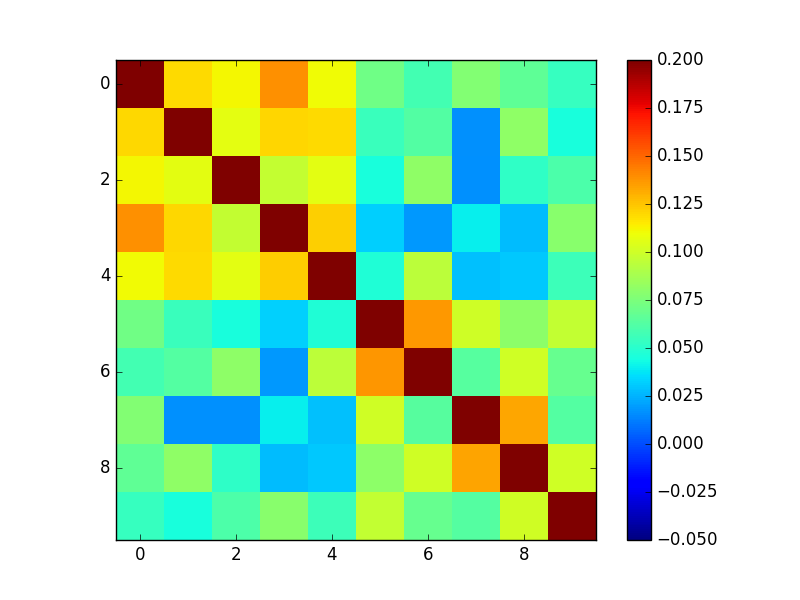

<IPython.core.display.Javascript object>


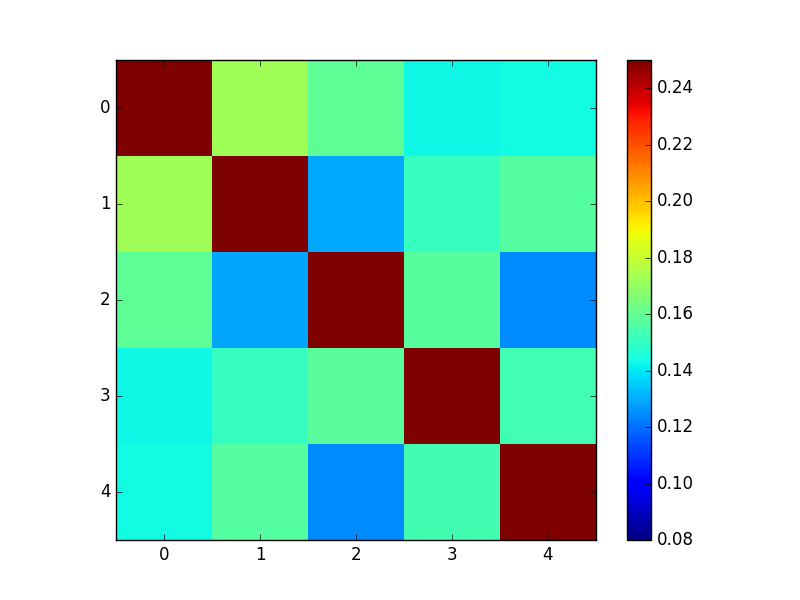

Rantvmpfc_z_avgsubj_10x10.shape (10, 10)
Rantvmpfc_z_avgsubj_10x10.shape (10, 10)
Rantvmpfc_z_avgsubj_5x5.shape (5, 5)
[ 1.          0.10763946  0.14746872  0.15861033  0.13391704  0.11547554
  0.05983058  0.0813781   0.07931127  0.09595072]
[ 1.          0.18118733  0.19347114  0.21769338  0.20903755]


<IPython.core.display.Javascript object>


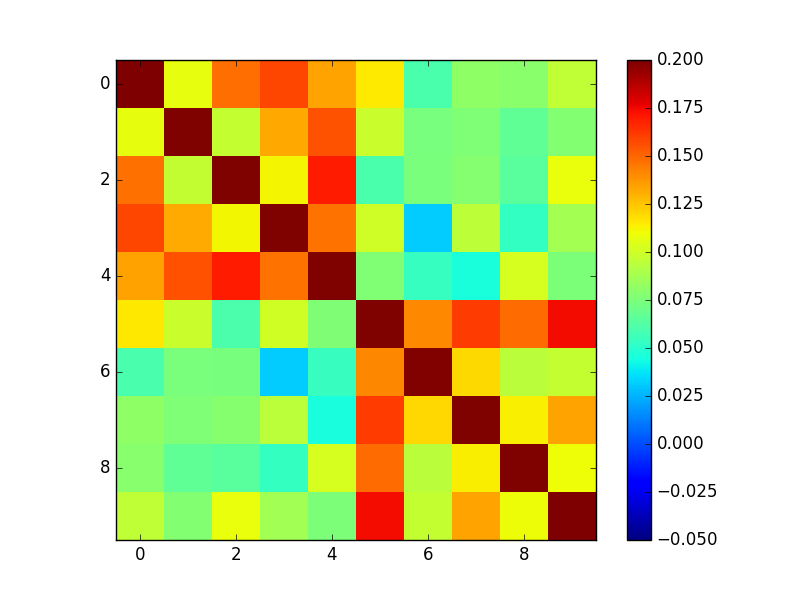

<IPython.core.display.Javascript object>


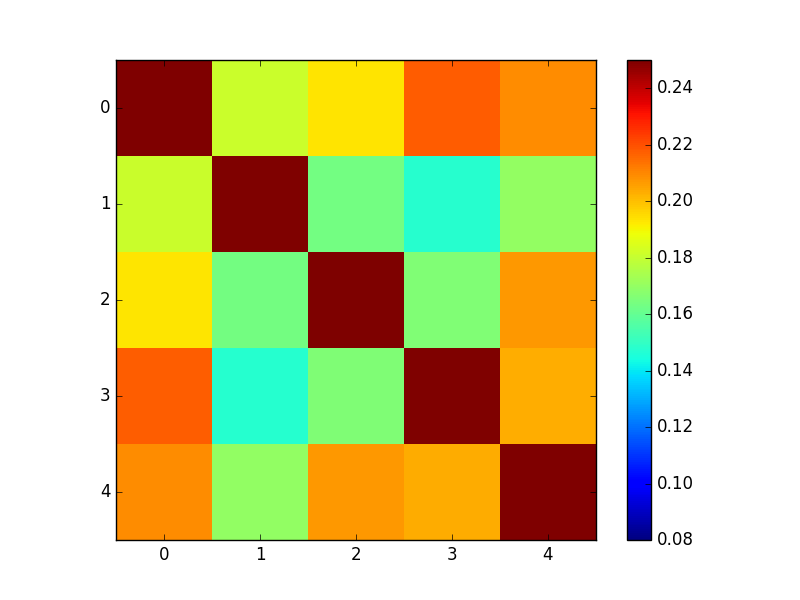

In [20]:
#now average z-values across subjects to get mini matrices for amyg and antvmpfc

# amyg
for i in range (0,10): #do this 10 times
    Ramyg_z_avgsubj_10 = np.mean(Ramyg_concat_z_310x10[i:Ramyg_concat_z_310x10.shape[0]:10], axis=0) 
    #average across all subjects based on the trial# (every 60th row)

    #use if statement to concatenate the averages from above for all trials
    if i == 0:  #if the first one
        Ramyg_z_avgsubj_10x10 = Ramyg_z_avgsubj_10[None,:]  
        #print(Ramyg_avg_subj_bytrial.shape)
    else:
        Ramyg_z_avgsubj_10x10 = np.vstack([Ramyg_z_avgsubj_10x10, Ramyg_z_avgsubj_10[None,:]]) 

print('Ramyg_z_avgsubj_10x10.shape',Ramyg_z_avgsubj_10x10.shape)
#print(Ramyg_r_subjwise_mini)


for i in range (0,5): #do this 5 times
    Ramyg_z_avgsubj_5 = np.mean(Ramyg_concat_z_155x5[i:Ramyg_concat_z_155x5.shape[0]:5], axis=0) 
    #average across all subjects based on the trial# (every 5th row)

    #use if statement to concatenate the averages from above for all trials
    if i == 0:  #if the first one
        Ramyg_z_avgsubj_5x5 = Ramyg_z_avgsubj_5[None,:]  
        #print(Ramyg_avg_subj_bytrial.shape)
    else:
        Ramyg_z_avgsubj_5x5 = np.vstack([Ramyg_z_avgsubj_5x5, Ramyg_z_avgsubj_5[None,:]]) 

print('Ramyg_z_avgsubj_10x10.shape',Ramyg_z_avgsubj_10x10.shape)
print('Ramyg_z_avgsubj_5x5.shape',Ramyg_z_avgsubj_5x5.shape)

#print(Ramyg_r_subjwise_mini)

#change Inf to 1

Ramyg_z_avgsubj_10x10[np.isposinf(Ramyg_z_avgsubj_10x10)] = 1
print(Ramyg_z_avgsubj_10x10[0])

Ramyg_z_avgsubj_5x5[np.isposinf(Ramyg_z_avgsubj_5x5)] = 1
print(Ramyg_z_avgsubj_5x5[0])


plt.rcParams["figure.dpi"] = 100.0
#Ramyg_r = np.corrcoef(Ramyg_avg_subj_bytrial) #numpy corrcoef expects array input to be in variable x observations shape 
#(which is why this was transposed in load_data)
plt.figure()
plt.imshow(Ramyg_z_avgsubj_10x10, cmap='jet', interpolation='none')
plt.clim(-0.05, 0.2)
#plt.xaxis.set_minor_locator(AutoMinorLocator())
plt.colorbar()
plt.savefig('Ramyg_z_avgsubj_10x10.png', dpi=300)


plt.rcParams["figure.dpi"] = 100.0
#Ramyg_r = np.corrcoef(Ramyg_avg_subj_bytrial) #numpy corrcoef expects array input to be in variable x observations shape 
#(which is why this was transposed in load_data)
plt.figure()
plt.imshow(Ramyg_z_avgsubj_5x5, cmap='jet', interpolation='none')
plt.clim(0.08, 0.25)
#plt.xaxis.set_minor_locator(AutoMinorLocator())
plt.colorbar()
plt.savefig('Ramyg_z_avgsubj_5x5.png', dpi=300)

# antvmpfc

for i in range (0,10): #do this 10 times
    Rantvmpfc_z_avgsubj_10 = np.mean(Rantvmpfc_concat_z_310x10[i:Rantvmpfc_concat_z_310x10.shape[0]:10], axis=0) 
    #average across all subjects based on the trial# (every 60th row)

    #use if statement to concatenate the averages from above for all trials
    if i == 0:  #if the first one
        Rantvmpfc_z_avgsubj_10x10 = Rantvmpfc_z_avgsubj_10[None,:]  
        #print(Rantvmpfc_avg_subj_bytrial.shape)
    else:
        Rantvmpfc_z_avgsubj_10x10 = np.vstack([Rantvmpfc_z_avgsubj_10x10, Rantvmpfc_z_avgsubj_10[None,:]]) 

print('Rantvmpfc_z_avgsubj_10x10.shape',Rantvmpfc_z_avgsubj_10x10.shape)
#print(Rantvmpfc_r_subjwise_mini)


for i in range (0,5): #do this 5 times
    Rantvmpfc_z_avgsubj_5 = np.mean(Rantvmpfc_concat_z_155x5[i:Rantvmpfc_concat_z_155x5.shape[0]:5], axis=0) 
    #average across all subjects based on the trial# (every 5th row)

    #use if statement to concatenate the averages from above for all trials
    if i == 0:  #if the first one
        Rantvmpfc_z_avgsubj_5x5 = Rantvmpfc_z_avgsubj_5[None,:]  
        #print(Rantvmpfc_avg_subj_bytrial.shape)
    else:
        Rantvmpfc_z_avgsubj_5x5 = np.vstack([Rantvmpfc_z_avgsubj_5x5, Rantvmpfc_z_avgsubj_5[None,:]]) 

print('Rantvmpfc_z_avgsubj_10x10.shape',Rantvmpfc_z_avgsubj_10x10.shape)
print('Rantvmpfc_z_avgsubj_5x5.shape',Rantvmpfc_z_avgsubj_5x5.shape)

#print(Rantvmpfc_r_subjwise_mini)

#change Inf to 1

Rantvmpfc_z_avgsubj_10x10[np.isposinf(Rantvmpfc_z_avgsubj_10x10)] = 1
print(Rantvmpfc_z_avgsubj_10x10[0])

Rantvmpfc_z_avgsubj_5x5[np.isposinf(Rantvmpfc_z_avgsubj_5x5)] = 1
print(Rantvmpfc_z_avgsubj_5x5[0])


plt.rcParams["figure.dpi"] = 100.0
#Rantvmpfc_r = np.corrcoef(Rantvmpfc_avg_subj_bytrial) #numpy corrcoef expects array input to be in variable x observations shape 
#(which is why this was transposed in load_data)
plt.figure()
plt.imshow(Rantvmpfc_z_avgsubj_10x10, cmap='jet', interpolation='none')
plt.clim(-0.05, 0.2)
#plt.xaxis.set_minor_locator(AutoMinorLocator())
plt.colorbar()
plt.savefig('Rantvmpfc_z_avgsubj_10x10.png', dpi=300)


plt.rcParams["figure.dpi"] = 100.0
#Rantvmpfc_r = np.corrcoef(Rantvmpfc_avg_subj_bytrial) #numpy corrcoef expects array input to be in variable x observations shape 
#(which is why this was transposed in load_data)
plt.figure()
plt.imshow(Rantvmpfc_z_avgsubj_5x5, cmap='jet', interpolation='none')
plt.clim(0.08, 0.25)
#plt.xaxis.set_minor_locator(AutoMinorLocator())
plt.colorbar()
plt.savefig('Rantvmpfc_z_avgsubj_5x5.png', dpi=300)



In [12]:
#pull out cells of interest for amyg and antvmpfc

#amyg

#AvsB (2,1)

sub = ['A328', 'A348', 'A415', 'A417', 'A420', 'A425', 'A437', 'A439', 'A548', 'A555', 'A556', 'A559', 'A583', 'A585', 'A592', 'A597', 'A600', 'A611', 'A616', 'A618', 'A620', 'A622', 'A625', 'A632', 'A634', 'A526', 'A640', 'A641', 'A642', 'A643', 'A647'] 

#Ramyg
for x in sub:
    subj_name = str(x)
    z_varname_5 = "subject_level_data/" + subj_name + "_Ramyg_z_5x5.csv"
    Ramyg_z_5x5= np.genfromtxt(z_varname_5, delimiter=",")

    Ramyg_subjwise_BvsA = Ramyg_z_5x5[2,1] 
    Ramyg_subjwise_ABvsA = Ramyg_z_5x5[3,1]
    Ramyg_subjwise_ABvsB = Ramyg_z_5x5[3,2] 
    #use if statement to concatenate the averages from above for all trials
    if x == str(sub[0]):  #if the first one
        Ramyg_BvsA_31 = Ramyg_subjwise_BvsA 
        Ramyg_ABvsA_31 = Ramyg_subjwise_ABvsA 
        Ramyg_ABvsB_31 = Ramyg_subjwise_ABvsB 

    else:
        Ramyg_BvsA_31 = np.vstack([Ramyg_BvsA_31, Ramyg_subjwise_BvsA]) #This is not working currently because the axis are differeny
        Ramyg_ABvsA_31 = np.vstack([Ramyg_ABvsA_31, Ramyg_subjwise_ABvsA]) #This is not working currently because the axis are differeny
        Ramyg_ABvsB_31 = np.vstack([Ramyg_ABvsB_31, Ramyg_subjwise_ABvsB]) #This is not working currently because the axis are differeny

 
#print(Ramyg_ABvsA_31)

z_varname_31 = "z_scores/" + "Ramyg_BvsA_31.csv"
np.savetxt(z_varname_31, Ramyg_BvsA_31,  delimiter=",")
z_varname_31 = "z_scores/" + "Ramyg_ABvsA_31.csv"
np.savetxt(z_varname_31, Ramyg_ABvsA_31,  delimiter=",")
z_varname_31 = "z_scores/" + "Ramyg_ABvsB_31.csv"
np.savetxt(z_varname_31, Ramyg_ABvsB_31,  delimiter=",")
        
# print(np.sum(Ramyg_BvsA_31))
# print(np.sum(Ramyg_ABvsA_31))
# print(np.sum(Ramyg_ABvsB_31))

#antvmpfc

#pull out cells of interest

#AvsB (2,1) 
    
sub = ['A328', 'A348', 'A415', 'A417', 'A420', 'A425', 'A437', 'A439', 'A548', 'A555', 'A556', 'A559', 'A583', 'A585', 'A592', 'A597', 'A600', 'A611', 'A616', 'A618', 'A620', 'A622', 'A625', 'A632', 'A634', 'A526', 'A640', 'A641', 'A642', 'A643', 'A647'] 

#Rantvmpfc
for x in sub:
    subj_name = str(x)
    z_varname_5 = "subject_level_data/" + subj_name + "_Rantvmpfc_z_5x5.csv"
    Rantvmpfc_z_5x5= np.genfromtxt(z_varname_5, delimiter=",")

    Rantvmpfc_subjwise_BvsA = Rantvmpfc_z_5x5[2,1] 
    Rantvmpfc_subjwise_ABvsA = Rantvmpfc_z_5x5[3,1]
    Rantvmpfc_subjwise_ABvsB = Rantvmpfc_z_5x5[3,2] 
    #use if statement to concatenate the averages from above for all trials
    if x == str(sub[0]):  #if the first one
        Rantvmpfc_BvsA_31 = Rantvmpfc_subjwise_BvsA 
        Rantvmpfc_ABvsA_31 = Rantvmpfc_subjwise_ABvsA 
        Rantvmpfc_ABvsB_31 = Rantvmpfc_subjwise_ABvsB 

    else:
        Rantvmpfc_BvsA_31 = np.vstack([Rantvmpfc_BvsA_31, Rantvmpfc_subjwise_BvsA]) #This is not working currently because the axis are differeny
        Rantvmpfc_ABvsA_31 = np.vstack([Rantvmpfc_ABvsA_31, Rantvmpfc_subjwise_ABvsA]) #This is not working currently because the axis are differeny
        Rantvmpfc_ABvsB_31 = np.vstack([Rantvmpfc_ABvsB_31, Rantvmpfc_subjwise_ABvsB]) #This is not working currently because the axis are differeny

 
#print(Rantvmpfc_ABvsA_31)

z_varname_31 = "z_scores/" + "Rantvmpfc_BvsA_31.csv"
np.savetxt(z_varname_31, Rantvmpfc_BvsA_31,  delimiter=",")
z_varname_31 = "z_scores/" + "Rantvmpfc_ABvsA_31.csv"
np.savetxt(z_varname_31, Rantvmpfc_ABvsA_31,  delimiter=",")
z_varname_31 = "z_scores/" + "Rantvmpfc_ABvsB_31.csv"
np.savetxt(z_varname_31, Rantvmpfc_ABvsB_31,  delimiter=",")
        
# print(np.mean(Rantvmpfc_BvsA_31))
# print(np.sum(Rantvmpfc_ABvsA_31))
# print(np.sum(Rantvmpfc_ABvsB_31))

In [41]:
#pull out cells of interest for testing 1 and testing 2

    
    
sub = ['A328', 'A348', 'A415', 'A417', 'A420', 'A425', 'A437', 'A439', 'A548', 'A555', 'A556', 'A559', 'A583', 'A585', 'A592', 'A597', 'A600', 'A611', 'A616', 'A618', 'A620', 'A622', 'A625', 'A632', 'A634', 'A526', 'A640', 'A641', 'A642', 'A643', 'A647'] 

#Ramyg
for x in sub:
    subj_name = str(x)
    z_varname_10 = "subject_level_data/" + subj_name + "_Ramyg_z_10x10.csv"
    Ramyg_z_10x10= np.genfromtxt(z_varname_10, delimiter=",")

    Ramyg_subjwise_BvsA_t1 = Ramyg_z_10x10[2,1] 
    Ramyg_subjwise_ABvsA_t1 = Ramyg_z_10x10[3,1]
    Ramyg_subjwise_ABvsB_t1 = Ramyg_z_10x10[3,2] 
    
    Ramyg_subjwise_BvsA_t2 = Ramyg_z_10x10[7,6] 
    Ramyg_subjwise_ABvsA_t2 = Ramyg_z_10x10[8,6]
    Ramyg_subjwise_ABvsB_t2 = Ramyg_z_10x10[8,7]
    
    #use if statement to concatenate the averages from above for all trials
    if x == str(sub[0]):  #if the first one
        Ramyg_BvsA_t1_31 = Ramyg_subjwise_BvsA_t1
        Ramyg_ABvsA_t1_31 = Ramyg_subjwise_ABvsA_t1 
        Ramyg_ABvsB_t1_31 = Ramyg_subjwise_ABvsB_t1 
        
        Ramyg_BvsA_t2_31 = Ramyg_subjwise_BvsA_t2
        Ramyg_ABvsA_t2_31 = Ramyg_subjwise_ABvsA_t2 
        Ramyg_ABvsB_t2_31 = Ramyg_subjwise_ABvsB_t2 


    else:
        Ramyg_BvsA_t1_31 = np.vstack([Ramyg_BvsA_t1_31, Ramyg_subjwise_BvsA_t1]) #This is not working currently because the axis are differeny
        Ramyg_ABvsA_t1_31 = np.vstack([Ramyg_ABvsA_t1_31, Ramyg_subjwise_ABvsA_t1]) #This is not working currently because the axis are differeny
        Ramyg_ABvsB_t1_31 = np.vstack([Ramyg_ABvsB_t1_31, Ramyg_subjwise_ABvsB_t1]) #This is not working currently because the axis are differeny

        Ramyg_BvsA_t2_31 = np.vstack([Ramyg_BvsA_t2_31, Ramyg_subjwise_BvsA_t2]) #This is not working currently because the axis are differeny
        Ramyg_ABvsA_t2_31 = np.vstack([Ramyg_ABvsA_t2_31, Ramyg_subjwise_ABvsA_t2]) #This is not working currently because the axis are differeny
        Ramyg_ABvsB_t2_31 = np.vstack([Ramyg_ABvsB_t2_31, Ramyg_subjwise_ABvsB_t2]) #This is not working currently because the axis are differeny

 
#print(Ramyg_ABvsA_31)

z_varname_31_t1 = "z_scores/" + "Ramyg_BvsA_t1_31.csv"
np.savetxt(z_varname_31_t1, Ramyg_BvsA_t1_31,  delimiter=",")
z_varname_31_t1 = "z_scores/" + "Ramyg_ABvsA_t1_31.csv"
np.savetxt(z_varname_31_t1, Ramyg_ABvsA_t1_31,  delimiter=",")
z_varname_31_t1 = "z_scores/" + "Ramyg_ABvsB_t1_31.csv"
np.savetxt(z_varname_31_t1, Ramyg_ABvsB_t1_31,  delimiter=",")


z_varname_31_t2 = "z_scores/" + "Ramyg_BvsA_t2_31.csv"
np.savetxt(z_varname_31_t2, Ramyg_BvsA_t2_31,  delimiter=",")
z_varname_31_t2 = "z_scores/" + "Ramyg_ABvsA_t2_31.csv"
np.savetxt(z_varname_31_t2, Ramyg_ABvsA_t2_31,  delimiter=",")
z_varname_31_t2 = "z_scores/" + "Ramyg_ABvsB_t2_31.csv"
np.savetxt(z_varname_31_t2, Ramyg_ABvsB_t2_31,  delimiter=",")
        
print(np.mean(Ramyg_BvsA_t1_31))
print(np.mean(Ramyg_ABvsA_t1_31))
print(np.mean(Ramyg_ABvsB_t1_31))

print(np.mean(Ramyg_BvsA_t2_31))
print(np.mean(Ramyg_ABvsA_t2_31))
print(np.mean(Ramyg_ABvsB_t2_31))


#pull out cells of interest for testing 1 and testing 2

#AvsB (2,1)

    
    
sub = ['A328', 'A348', 'A415', 'A417', 'A420', 'A425', 'A437', 'A439', 'A548', 'A555', 'A556', 'A559', 'A583', 'A585', 'A592', 'A597', 'A600', 'A611', 'A616', 'A618', 'A620', 'A622', 'A625', 'A632', 'A634', 'A526', 'A640', 'A641', 'A642', 'A643', 'A647'] 

#Rantvmpfc
for x in sub:
    subj_name = str(x)
    z_varname_10 = "subject_level_data/" + subj_name + "_Rantvmpfc_z_10x10.csv"
    Rantvmpfc_z_10x10= np.genfromtxt(z_varname_10, delimiter=",")

    Rantvmpfc_subjwise_BvsA_t1 = Rantvmpfc_z_10x10[2,1] 
    Rantvmpfc_subjwise_ABvsA_t1 = Rantvmpfc_z_10x10[3,1]
    Rantvmpfc_subjwise_ABvsB_t1 = Rantvmpfc_z_10x10[3,2] 
    
    Rantvmpfc_subjwise_BvsA_t2 = Rantvmpfc_z_10x10[7,6] 
    Rantvmpfc_subjwise_ABvsA_t2 = Rantvmpfc_z_10x10[8,6]
    Rantvmpfc_subjwise_ABvsB_t2 = Rantvmpfc_z_10x10[8,7]
    
    #use if statement to concatenate the averages from above for all trials
    if x == str(sub[0]):  #if the first one
        Rantvmpfc_BvsA_t1_31 = Rantvmpfc_subjwise_BvsA_t1
        Rantvmpfc_ABvsA_t1_31 = Rantvmpfc_subjwise_ABvsA_t1 
        Rantvmpfc_ABvsB_t1_31 = Rantvmpfc_subjwise_ABvsB_t1 
        
        Rantvmpfc_BvsA_t2_31 = Rantvmpfc_subjwise_BvsA_t2
        Rantvmpfc_ABvsA_t2_31 = Rantvmpfc_subjwise_ABvsA_t2 
        Rantvmpfc_ABvsB_t2_31 = Rantvmpfc_subjwise_ABvsB_t2 


    else:
        Rantvmpfc_BvsA_t1_31 = np.vstack([Rantvmpfc_BvsA_t1_31, Rantvmpfc_subjwise_BvsA_t1]) #This is not working currently because the axis are differeny
        Rantvmpfc_ABvsA_t1_31 = np.vstack([Rantvmpfc_ABvsA_t1_31, Rantvmpfc_subjwise_ABvsA_t1]) #This is not working currently because the axis are differeny
        Rantvmpfc_ABvsB_t1_31 = np.vstack([Rantvmpfc_ABvsB_t1_31, Rantvmpfc_subjwise_ABvsB_t1]) #This is not working currently because the axis are differeny

        Rantvmpfc_BvsA_t2_31 = np.vstack([Rantvmpfc_BvsA_t2_31, Rantvmpfc_subjwise_BvsA_t2]) #This is not working currently because the axis are differeny
        Rantvmpfc_ABvsA_t2_31 = np.vstack([Rantvmpfc_ABvsA_t2_31, Rantvmpfc_subjwise_ABvsA_t2]) #This is not working currently because the axis are differeny
        Rantvmpfc_ABvsB_t2_31 = np.vstack([Rantvmpfc_ABvsB_t2_31, Rantvmpfc_subjwise_ABvsB_t2]) #This is not working currently because the axis are differeny

 
#print(Rantvmpfc_ABvsA_31)

z_varname_31_t1 = "z_scores/" + "Rantvmpfc_BvsA_t1_31.csv"
np.savetxt(z_varname_31_t1, Rantvmpfc_BvsA_t1_31,  delimiter=",")
z_varname_31_t1 = "z_scores/" + "Rantvmpfc_ABvsA_t1_31.csv"
np.savetxt(z_varname_31_t1, Rantvmpfc_ABvsA_t1_31,  delimiter=",")
z_varname_31_t1 = "z_scores/" + "Rantvmpfc_ABvsB_t1_31.csv"
np.savetxt(z_varname_31_t1, Rantvmpfc_ABvsB_t1_31,  delimiter=",")


z_varname_31_t2 = "z_scores/" + "Rantvmpfc_BvsA_t2_31.csv"
np.savetxt(z_varname_31_t2, Rantvmpfc_BvsA_t2_31,  delimiter=",")
z_varname_31_t2 = "z_scores/" + "Rantvmpfc_ABvsA_t2_31.csv"
np.savetxt(z_varname_31_t2, Rantvmpfc_ABvsA_t2_31,  delimiter=",")
z_varname_31_t2 = "z_scores/" + "Rantvmpfc_ABvsB_t2_31.csv"
np.savetxt(z_varname_31_t2, Rantvmpfc_ABvsB_t2_31,  delimiter=",")
        
print(np.mean(Rantvmpfc_BvsA_t1_31))
print(np.mean(Rantvmpfc_ABvsA_t1_31))
print(np.mean(Rantvmpfc_ABvsB_t1_31))

print(np.mean(Rantvmpfc_BvsA_t2_31))
print(np.mean(Rantvmpfc_ABvsA_t2_31))
print(np.mean(Rantvmpfc_ABvsB_t2_31))

0.106513959004
0.120889242514
0.0972666191995
0.0640396538859
0.101069893354
0.13262544612
0.0967070744805
0.132613426063
0.111606525214
0.119541036087
0.0935890412506
0.113622497129


In [27]:

Ramyg_BvsA_31_p, Ramyg_BvsA_31_sign_count = randomise_diff(Ramyg_BvsA_31, resample_num=10000)
print(Ramyg_BvsA_31_sign_count)
print(format(Ramyg_BvsA_31_p,'.30f'))
# p_varname = "p_values/" + "Ramyg_BvsA_31_p.csv"
# np.savetxt(p_varname, Ramyg_BvsA_31_p[None])

Ramyg_ABvsA_31_p, Ramyg_ABvsA_31_sign_count = randomise_diff(Ramyg_ABvsA_31, resample_num=10000)
print(Ramyg_ABvsA_31_sign_count)
print(format(Ramyg_ABvsA_31_p,'.30f'))
# p_varname = "p_values/" + "Ramyg_ABvsA_31_p.csv"
# np.savetxt(p_varname, Ramyg_ABvsA_31_p[None])

Ramyg_ABvsB_31_p, Ramyg_ABvsB_31_sign_count = randomise_diff(Ramyg_ABvsB_31, resample_num=10000)
print(Ramyg_ABvsB_31_sign_count)
print(format(Ramyg_ABvsB_31_p,'.30f'))
# p_varname = "p_values/" + "Ramyg_ABvsB_31_p.csv"
# np.savetxt(p_varname, Ramyg_ABvsB_31_p[None])

Rantvmpfc_BvsA_31_p, Rantvmpfc_BvsA_31_sign_count = randomise_diff(Rantvmpfc_BvsA_31, resample_num=10000)
print(Ramyg_BvsA_31_sign_count)
print(format(Rantvmpfc_BvsA_31_p,'.30f'))
# p_varname = "p_values/" + "Rantvmpfc_BvsA_31_p.csv"
# np.savetxt(p_varname, Rantvmpfc_BvsA_31_p[None])

Rantvmpfc_ABvsA_31_p, Rantvmpfc_ABvsA_31_sign_count = randomise_diff(Rantvmpfc_ABvsA_31, resample_num=10000)
print(Rantvmpfc_ABvsA_31_sign_count)
print(format(Rantvmpfc_ABvsA_31_p,'.30f'))
# p_varname = "p_values/" + "Rantvmpfc_ABvsA_31_p.csv"
# np.savetxt(p_varname, Rantvmpfc_ABvsA_31_p[None])

Rantvmpfc_ABvsB_31_p, Rantvmpfc_ABvsB_31_sign_count = randomise_diff(Rantvmpfc_ABvsB_31, resample_num=10000)
print(Rantvmpfc_ABvsB_31_sign_count)
print(format(Rantvmpfc_ABvsB_31_p,'.30f'))
# p_varname = "p_values/" + "Rantvmpfc_ABvsB_31_p.csv"
# np.savetxt(p_varname, Rantvmpfc_ABvsB_31_p[None])

24
0.000199980001999833234549441840
24
0.000199980001999833234549441840
30
0.000199980001999833234549441840
24
0.000199980001999833234549441840
25
0.000199980001999833234549441840
24
0.000199980001999833234549441840


In [38]:
#run randomise_diff with testing 1 and testing 2




#Ramyg

#run randomise_diff with testing 1 and testing 2

Ramyg_BvsA_t1_31_p, Ramyg_BvsA_t1_31_sign_count = randomise_diff(Ramyg_BvsA_t1_31, resample_num=10000)
print(Ramyg_BvsA_t1_31_sign_count)
print(format(Ramyg_BvsA_t1_31_p,'.30f'))
# p_varname = "p_values/" + "Ramyg_BvsA_t1_31_p.csv"
# np.savetxt(p_varname, Ramyg_BvsA_t1_31_p[None])

Ramyg_ABvsA_t1_31_p, Ramyg_ABvsA_t1_31_sign_count = randomise_diff(Ramyg_ABvsA_t1_31, resample_num=10000)
print(Ramyg_ABvsA_t1_31_sign_count)
print(format(Ramyg_ABvsA_t1_31_p,'.30f'))
# p_varname = "p_values/" + "Ramyg_ABvsA_t1_31_p.csv"
# np.savetxt(p_varname, Ramyg_ABvsA_t1_31_p[None])

Ramyg_ABvsB_t1_31_p, Ramyg_ABvsB_t1_31_sign_count = randomise_diff(Ramyg_ABvsB_t1_31, resample_num=10000)
print(Ramyg_ABvsB_t1_31_sign_count)
print(format(Ramyg_ABvsB_t1_31_p,'.30f'))
# p_varname = "p_values/" + "Ramyg_ABvsB_t1_31_p.csv"
# np.savetxt(p_varname, Ramyg_ABvsB_t1_31_p[None])



Ramyg_BvsA_t2_31_p, Ramyg_BvsA_t2_31_sign_count = randomise_diff(Ramyg_BvsA_t2_31, resample_num=10000)
print(Ramyg_BvsA_t2_31_sign_count)
print(format(Ramyg_BvsA_t2_31_p,'.30f'))
# p_varname = "p_values/" + "Ramyg_BvsA_t2_31_p.csv"
# np.savetxt(p_varname, Ramyg_BvsA_t2_31_p[None])

Ramyg_ABvsA_t2_31_p, Ramyg_ABvsA_t2_31_sign_count = randomise_diff(Ramyg_ABvsA_t2_31, resample_num=10000)
print(Ramyg_ABvsA_t2_31_sign_count)
print(format(Ramyg_ABvsA_t2_31_p,'.30f'))
# p_varname = "p_values/" + "Ramyg_ABvsA_t2_31_p.csv"
# np.savetxt(p_varname, Ramyg_ABvsA_t2_31_p[None])

Ramyg_ABvsB_t2_31_p, Ramyg_ABvsB_t2_31_sign_count = randomise_diff(Ramyg_ABvsB_t2_31, resample_num=10000)
print(Ramyg_ABvsB_t2_31_sign_count)
print(format(Ramyg_ABvsB_t2_31_p,'.30f'))
# p_varname = "p_values/" + "Ramyg_ABvsB_t2_31_p.csv"
# np.savetxt(p_varname, Ramyg_ABvsB_t2_31_p[None])



#Rantvmpf
Rantvmpfc_BvsA_t1_31_p, Rantvmpfc_BvsA_t1_31_sign_count = randomise_diff(Rantvmpfc_BvsA_t1_31, resample_num=10000)
print(Rantvmpfc_BvsA_t1_31_sign_count)
print(format(Rantvmpfc_BvsA_t1_31_p,'.30f'))
# p_varname = "p_values/" + "Rantvmpfc_BvsA_t1_31_p.csv"
# np.savetxt(p_varname, Rantvmpfc_BvsA_t1_31_p[None])

Rantvmpfc_ABvsA_t1_31_p, Rantvmpfc_ABvsA_t1_31_sign_count = randomise_diff(Rantvmpfc_ABvsA_t1_31, resample_num=10000)
print(Rantvmpfc_ABvsA_t1_31_sign_count)
print(format(Rantvmpfc_ABvsA_t1_31_p,'.30f'))
# p_varname = "p_values/" + "Rantvmpfc_ABvsA_t1_31_p.csv"
# np.savetxt(p_varname, Rantvmpfc_ABvsA_t1_31_p[None])

Rantvmpfc_ABvsB_t1_31_p, Rantvmpfc_ABvsB_t1_31_sign_count = randomise_diff(Rantvmpfc_ABvsB_t1_31, resample_num=10000)
print(Rantvmpfc_ABvsB_t1_31_sign_count)
print(format(Rantvmpfc_ABvsB_t1_31_p,'.30f'))
# p_varname = "p_values/" + "Rantvmpfc_ABvsB_t1_31_p.csv"
# np.savetxt(p_varname, Rantvmpfc_ABvsB_t1_31_p[None])


Rantvmpfc_BvsA_t2_31_p, Rantvmpfc_BvsA_t2_31_sign_count = randomise_diff(Rantvmpfc_BvsA_t2_31, resample_num=10000)
print(Rantvmpfc_BvsA_t2_31_sign_count)
print(format(Rantvmpfc_BvsA_t2_31_p,'.30f'))
# p_varname = "p_values/" + "Rantvmpfc_BvsA_t2_31_p.csv"
# np.savetxt(p_varname, Rantvmpfc_BvsA_t2_31_p[None])

Rantvmpfc_ABvsA_t2_31_p, Rantvmpfc_ABvsA_t2_31_sign_count = randomise_diff(Rantvmpfc_ABvsA_t2_31, resample_num=10000)
print(Rantvmpfc_ABvsA_t2_31_sign_count)
print(format(Rantvmpfc_ABvsA_t2_31_p,'.30f'))
# p_varname = "p_values/" + "Rantvmpfc_ABvsA_t2_31_p.csv"
# np.savetxt(p_varname, Rantvmpfc_ABvsA_t2_31_p[None])

Rantvmpfc_ABvsB_t2_31_p, Rantvmpfc_ABvsB_t2_31_sign_count = randomise_diff(Rantvmpfc_ABvsB_t2_31, resample_num=10000)
print(Rantvmpfc_ABvsB_t2_31_sign_count)
print(format(Rantvmpfc_ABvsB_t2_31_p,'.30f'))
# p_varname = "p_values/" + "Rantvmpfc_ABvsB_t2_31_p.csv"
# np.savetxt(p_varname, Rantvmpfc_ABvsB_t2_31_p[None])

25
0.000199980001999833234549441840
27
0.000199980001999833234549441840
24
0.002399760023997554725383452023
19
0.019398060193980493082221983059
24
0.000199980001999833234549441840
26
0.000199980001999833234549441840
25
0.000199980001999833234549441840
23
0.000199980001999833234549441840
21
0.001999800019998110300889493374
24
0.000599940005999499703648325521
22
0.003799620037996165322624619876
26
0.000599940005999499703648325521


<IPython.core.display.Javascript object>


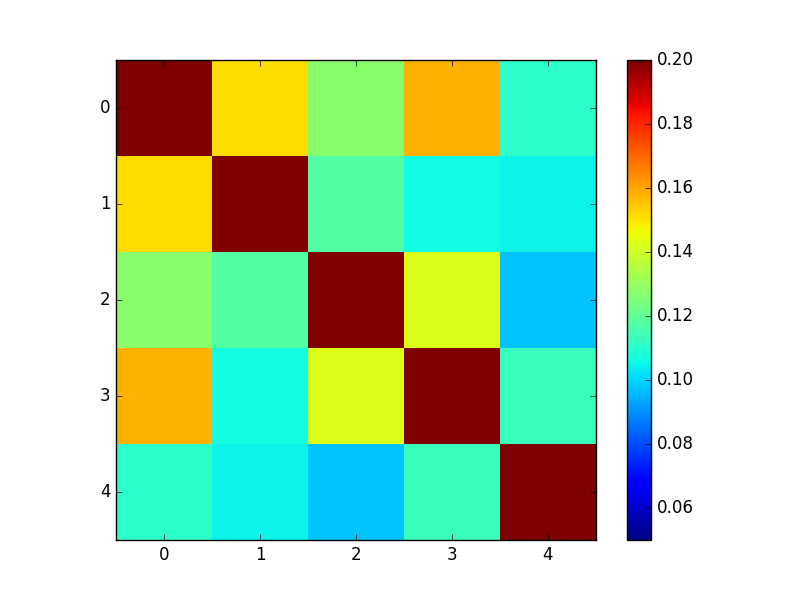

<IPython.core.display.Javascript object>


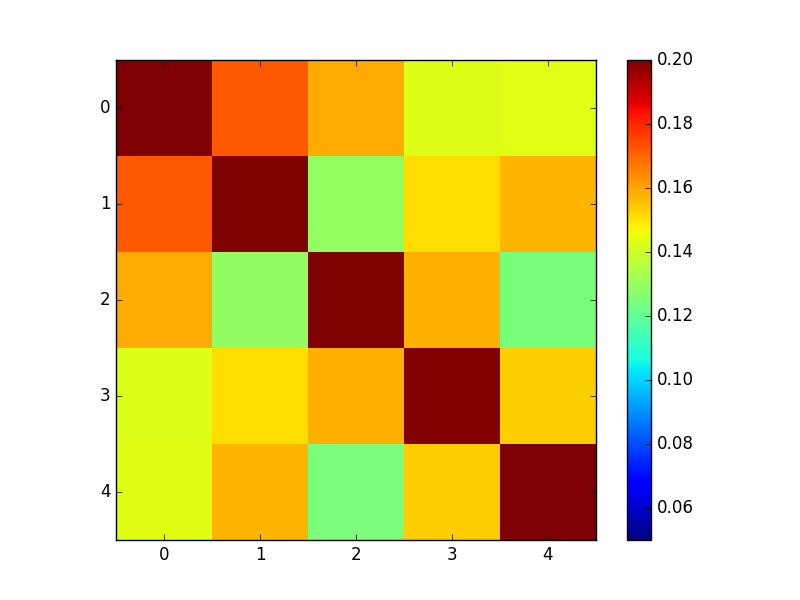

<IPython.core.display.Javascript object>


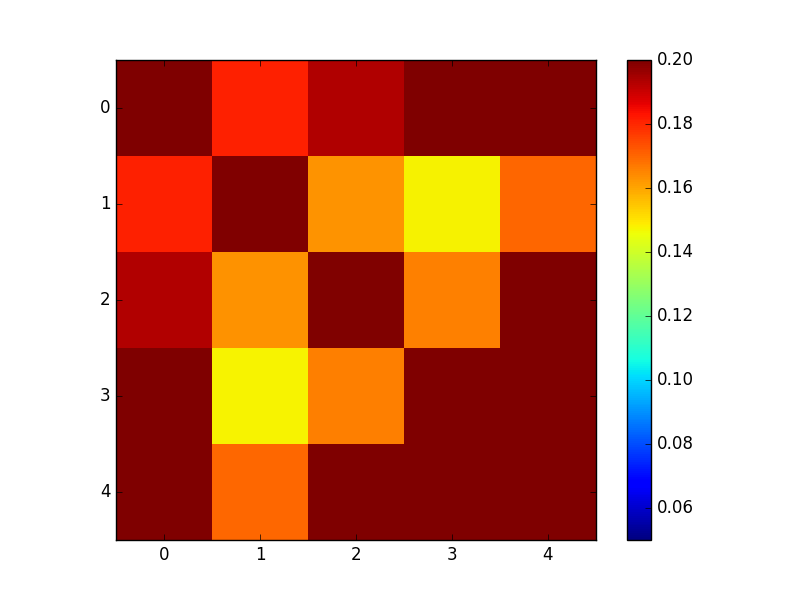

In [30]:
plt.rcParams["figure.dpi"] = 100.0
#Rhipp_r = np.corrcoef(Rhipp_avg_subj_bytrial) #numpy corrcoef expects array input to be in variable x observations shape 
#(which is why this was transposed in load_data)
plt.figure()
plt.imshow(Rhipp_z_avgsubj_5x5, cmap='jet', interpolation='none')
plt.clim(0.05, 0.2)
#plt.xaxis.set_minor_locator(AutoMinorLocator())
plt.colorbar()
plt.savefig('Rhipp_z_avgsubj_5x5.png', dpi=300)

plt.rcParams["figure.dpi"] = 100.0
#Rhipp_r = np.corrcoef(Rhipp_avg_subj_bytrial) #numpy corrcoef expects array input to be in variable x observations shape 
#(which is why this was transposed in load_data)
plt.figure()
plt.imshow(Ramyg_z_avgsubj_5x5, cmap='jet', interpolation='none')
plt.clim(0.05, 0.2)
#plt.xaxis.set_minor_locator(AutoMinorLocator())
plt.colorbar()
plt.savefig('Ramyg_z_avgsubj_5x5.png', dpi=300)

plt.rcParams["figure.dpi"] = 100.0
#Rhipp_r = np.corrcoef(Rhipp_avg_subj_bytrial) #numpy corrcoef expects array input to be in variable x observations shape 
#(which is why this was transposed in load_data)
plt.figure()
plt.imshow(Rantvmpfc_z_avgsubj_5x5, cmap='jet', interpolation='none')
plt.clim(0.05, 0.20)
#plt.xaxis.set_minor_locator(AutoMinorLocator())
plt.colorbar()
plt.savefig('Rantvmpfc_z_avgsubj_5x5.png', dpi=300)